<a href="https://colab.research.google.com/github/jocelynbaduria/cmpe-258-hw1/blob/main/Jocelyn_Baduria_Assignment_1_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Install and Import fastbook and its libraries


In [1]:
# Colab link : https://github.com/jocelynbaduria/cmpe-258-hw1/blob/main/Jocelyn_Baduria_Assignment_1_part_1.ipynb
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 14.9MB/s 
     |████████████████████████████████| 194kB 56.2MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 1.2MB 56.1MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

## 2. Write an image classification using cnn_learner

### Image **Dog** Classifier Code

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

### Function Dog Image Classifier has an error rate of less than 0.02.
def is_dog(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.162710,0.038662,0.010149,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.048340,0.023025,0.008119,00:54


In [ ]:
## Check if the Trained Model works for Dog Image Classification
## Uploaded dog and cat picture. Dog showed TRUE with probability of 1.000.
## It took me thrice before the cnn_learner classified the dog image correctly.
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 1.000000


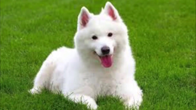

In [ ]:
### Showing the actual dog sample picture uploaded for prediction
img = PILImage.create(uploader.data[0])
img.to_thumb(196)

### Image **Cat** Classifier Code

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

### Function Cat Image Classifier has an error rate less than 0.02.
### It took me running twice the cnn_learner to correctly predict the cat.
def is_not_a_dog(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_not_a_dog, item_tfms=Resize(224)
)

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.163915,0.029786,0.009472,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.066633,0.016326,0.004736,00:54


In [ ]:
uploader1 = widgets.FileUpload()
uploader1

FileUpload(value={}, description='Upload')

In [ ]:
img2 = PILImage.create(uploader1.data[0])
is_not_a_dog,_,probs = learn.predict(img2)
print(f"Is this a cat?: {is_not_a_dog}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


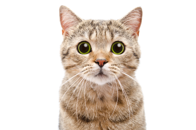

In [ ]:
### Showing the actual cat sample picture uploaded for prediction
img3 = PILImage.create(uploader1.data[0])
img3.to_thumb(196)

# 3. Write a Segmentation unet_learner


In [21]:
from fastbook import *
# I tried to use other dataset available from URLs module of external.py but I usually got error when I used differrent dataset.
# Some dataset are huge file that I got a runtime error CUDA out of memory. 
path = untar_data(URLs.CAMVID_TINY) 
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}', 
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.980977,2.594456,00:01


epoch,train_loss,valid_loss,time
0,1.798112,1.642938,00:01
1,1.562487,1.299903,00:01
2,1.404141,1.212645,00:01
3,1.279886,0.976708,00:01
4,1.167634,0.809135,00:01
5,1.064379,0.761189,00:01
6,0.976620,0.725213,00:01
7,0.906407,0.708429,00:01


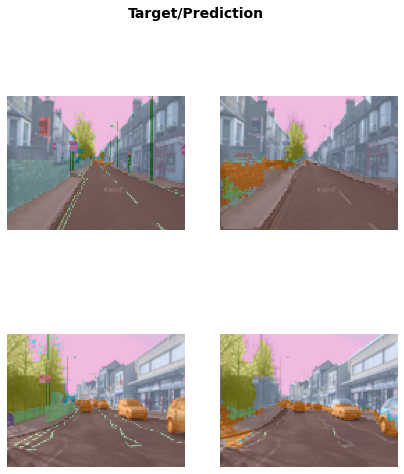

In [22]:
# Refer to the segmented image results
learn.show_results(max_n=6, figsize=(7,8))

In [15]:
path.ls

<bound method Path.ls of Path('/root/.fastai/data/camvid_tiny')>

In [69]:
# See sample other dataset for Segmentation Unet_learner that i tried  but I got error CUDA out of memory.
from fastbook import *
path = untar_data(URLs.CAMVID) 
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time


RuntimeError: ignored

In [43]:
### Download Berkeley Datases to FastAI Data folder. I need to study further how to use the SegmentationDataLoaders.from_label_func library and function.
path = URLs.path('/content/gdrive/MyDrive/cmpe-258-Deep Learning/bsds_data', c_key='data')
path.ls

<bound method Path.ls of Path('/root/.fastai/data/bsds_data')>

#4. Write a text_clasiffier_learner for Sentiment Analysis

In [ ]:
from fastai.text.all import *
# Load the IMDB text dataset and use text_classifier with metrics accuracy of greater than 90 % accuracy.
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.457940,0.390627,0.822400,03:38


epoch,train_loss,valid_loss,accuracy,time
0,0.305027,0.240440,0.904640,07:20
1,0.234245,0.212928,0.915800,07:20
2,0.187621,0.212511,0.917080,07:20
3,0.138459,0.196972,0.927640,07:20


In [ ]:
learn.predict("I do liked that movie!")

('pos', tensor(1), tensor([7.6910e-04, 9.9923e-01]))

In [ ]:
# Show the positive sentiment text analysis using the learn.show_results with data max_n=1.
# What I am trying to check here if the positive text I inputted will be shown in the predicted result.
learn.show_results(max_n=1, figsize=(5,5))

,text,category,category_
0,"xxbos xxmaj there 's a sign on xxmaj the xxmaj lost xxmaj highway that says : \n\n * major xxup spoilers xxup ahead * \n\n ( but you already knew that , did n't you ? ) \n\n xxmaj since there 's a great deal of people that apparently did not get the point of this movie , xxmaj i 'd like to contribute my interpretation of why the plot makes perfect sense . xxmaj as others have pointed out , one single viewing of this movie is not sufficient . xxmaj if you have the xxup dvd of xxup md , you can "" cheat "" by looking at xxmaj david xxmaj lynch 's "" top 10 xxmaj hints to xxmaj unlocking xxup md "" ( but only upon second or third viewing , please . ) ;) \n\n xxmaj first of all , xxmaj mulholland xxmaj drive is",pos,pos


#5. Write a tabular_learner Naive-Bayes Classifier: a Decision Tree Hybrid

In [ ]:
from fastai.tabular.all import *

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE)

### The trained model from adult.csv data shows above 80% accuracy.
### 
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names='salary',
      cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                   'relationship', 'race'],
      cont_names = ['age', 'fnlwgt', 'education-num'],
      procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
# I tried two methods of fit modeling - learn.fit_one_cycle(4) - Fit self.model for n_epoch using the 1cycle policy.
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.364475,0.366926,0.826167,00:04
1,0.360050,0.359399,0.834306,00:04
2,0.340926,0.352951,0.837531,00:04
3,0.331916,0.351906,0.837377,00:04


In [ ]:
# The other modeling is using Fine tune with freeze for freeze_epochs then with unfreeze from epochs using discriminative LR.
# Both results accuracy are above 80%.
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.366061,0.369795,0.824631,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.352219,0.362127,0.828624,00:04
1,0.343095,0.358244,0.832310,00:04
2,0.334864,0.353657,0.837991,00:04
3,0.326635,0.353253,0.838606,00:04


In [ ]:
# Tabular Result with predicted actual salary shows out of 9 data only one got a wrong prediction (workclass #1)
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,16.0,1.0,8.0,5.0,5.0,1.0,-0.481680,-0.014053,-0.028324,0.0,0.0
1,5.0,16.0,3.0,15.0,1.0,5.0,1.0,-0.481680,1.535594,-0.028324,1.0,0.0
2,5.0,16.0,5.0,8.0,3.0,5.0,1.0,-1.436288,0.855989,-0.028324,0.0,0.0
3,2.0,12.0,3.0,2.0,1.0,3.0,1.0,0.619790,-1.146707,-0.420362,1.0,1.0
4,5.0,2.0,1.0,13.0,5.0,5.0,1.0,0.252633,1.844539,-1.204438,0.0,0.0
5,5.0,16.0,3.0,5.0,1.0,5.0,1.0,0.986947,-0.472970,-0.028324,1.0,1.0
6,5.0,1.0,3.0,13.0,1.0,5.0,1.0,1.574398,0.331343,-1.596475,0.0,0.0
7,5.0,10.0,3.0,11.0,4.0,5.0,1.0,-0.701974,0.133069,1.147789,0.0,0.0
8,5.0,16.0,3.0,15.0,1.0,5.0,1.0,0.913515,-0.338569,-0.028324,0.0,0.0


#6. Write a colab_learner for ranking

In [5]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5)) # Create a Learner for collaborative filtering on dls.
learn.fine_tune(10) # Uses Fine tune with freeze for freeze_epochs then with unfreeze from epochs using discriminative LR.

epoch,train_loss,valid_loss,time
0,1.487913,1.446767,00:00


epoch,train_loss,valid_loss,time
0,1.353027,1.385478,00:00
1,1.253624,1.199274,00:00
2,1.008884,0.901407,00:00
3,0.790468,0.761518,00:00
4,0.680834,0.728500,00:00
5,0.631878,0.716760,00:00
6,0.612797,0.711426,00:00
7,0.591584,0.708980,00:00
8,0.594609,0.707997,00:00
9,0.596301,0.707945,00:00


In [7]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5)) # Create a Learner for collaborative filtering on dls.
learn.fit_one_cycle(10) # Uses Fine tune with freeze for freeze_epochs then with unfreeze from epochs using discriminative LR.

epoch,train_loss,valid_loss,time
0,1.576928,1.589776,00:00
1,1.520756,1.485028,00:00
2,1.291981,1.137881,00:00
3,0.932580,0.859210,00:00
4,0.742062,0.787379,00:00
5,0.661243,0.769903,00:00
6,0.625766,0.763896,00:00
7,0.603580,0.761450,00:00
8,0.604742,0.760512,00:00
9,0.602210,0.760474,00:00


In [8]:
# From the training model the rating prediction compared to actual rating is quite near to each other with 0.1 off from each other.
# We can say around 90%. I am just wondering why the learn.fine_tune and learn.fit_one_cycle doesn't have accuracy metric compared to other model tabular_learner.
learn.show_results(max_n=5)

,userId,movieId,rating,rating_pred
0,60.0,7.0,5.0,4.761141
1,60.0,66.0,4.5,4.489827
2,62.0,66.0,4.0,3.943447
3,88.0,24.0,3.5,3.416173
4,55.0,79.0,3.5,3.983392
